In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

#read data and preview it
df = pd.read_csv('https://query.data.world/s/254wzyu352gsbcze7tu3pckdjuuhm3')
df.head()

,PEOPLE_POSITIVE_CASES_COUNT,COUNTY_NAME,PROVINCE_STATE_NAME,REPORT_DATE,CONTINENT_NAME,DATA_SOURCE_NAME,PEOPLE_DEATH_NEW_COUNT,COUNTY_FIPS_NUMBER,COUNTRY_ALPHA_3_CODE,COUNTRY_SHORT_NAME,COUNTRY_ALPHA_2_CODE,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
0,940,White,Arkansas,2020-10-02,America,New York Times,0,5145.0,USA,United States,US,15,29
1,5917,White,Arkansas,2021-01-17,America,New York Times,0,5145.0,USA,United States,US,15,76
2,1047,White,Arkansas,2020-10-08,America,New York Times,0,5145.0,USA,United States,US,34,29
3,14400,White,Arkansas,2021-12-20,America,New York Times,1,5145.0,USA,United States,US,57,209
4,4,White,Arkansas,2020-03-25,America,New York Times,0,5145.0,USA,United States,US,0,0


In [9]:
#identify incomplete rows
df.count()

PEOPLE_POSITIVE_CASES_COUNT        2898955
COUNTY_NAME                        2670755
PROVINCE_STATE_NAME                2717210
REPORT_DATE                        2898955
CONTINENT_NAME                     2888360
DATA_SOURCE_NAME                   2898955
PEOPLE_DEATH_NEW_COUNT             2898955
COUNTY_FIPS_NUMBER                 2624300
COUNTRY_ALPHA_3_CODE               2888360
COUNTRY_SHORT_NAME                 2898955
COUNTRY_ALPHA_2_CODE               2887545
PEOPLE_POSITIVE_NEW_CASES_COUNT    2898955
PEOPLE_DEATH_COUNT                 2898955
dtype: int64

In [38]:
#drop rows with missing info
drop_missing_df = df.dropna(how ='any')
drop_missing_df = drop_missing_df[drop_missing_df["PEOPLE_DEATH_NEW_COUNT"] > 0]
drop_missing_df

,PEOPLE_POSITIVE_CASES_COUNT,COUNTY_NAME,PROVINCE_STATE_NAME,REPORT_DATE,CONTINENT_NAME,DATA_SOURCE_NAME,PEOPLE_DEATH_NEW_COUNT,COUNTY_FIPS_NUMBER,COUNTRY_ALPHA_3_CODE,COUNTRY_SHORT_NAME,COUNTRY_ALPHA_2_CODE,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
3,14400,White,Arkansas,2021-12-20,America,New York Times,1,5145.0,USA,United States,US,57,209
12,20207,White,Arkansas,2022-02-01,America,New York Times,4,5145.0,USA,United States,US,229,230
13,8366,White,Arkansas,2021-06-29,America,New York Times,1,5145.0,USA,United States,US,22,124
14,20640,White,Arkansas,2022-02-06,America,New York Times,1,5145.0,USA,United States,US,83,235
17,8097,White,Arkansas,2021-05-24,America,New York Times,2,5145.0,USA,United States,US,0,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2898769,2233,Washington,Idaho,2022-02-14,America,New York Times,1,16087.0,USA,United States,US,11,54
2898773,2282,Washington,Idaho,2022-02-18,America,New York Times,2,16087.0,USA,United States,US,12,56
2898785,2345,Washington,Idaho,2022-03-02,America,New York Times,1,16087.0,USA,United States,US,13,57
2898805,2367,Washington,Idaho,2022-03-22,America,New York Times,1,16087.0,USA,United States,US,1,57


In [39]:
#verify dropped rows
drop_missing_df.count()

PEOPLE_POSITIVE_CASES_COUNT        333915
COUNTY_NAME                        333915
PROVINCE_STATE_NAME                333915
REPORT_DATE                        333915
CONTINENT_NAME                     333915
DATA_SOURCE_NAME                   333915
PEOPLE_DEATH_NEW_COUNT             333915
COUNTY_FIPS_NUMBER                 333915
COUNTRY_ALPHA_3_CODE               333915
COUNTRY_SHORT_NAME                 333915
COUNTRY_ALPHA_2_CODE               333915
PEOPLE_POSITIVE_NEW_CASES_COUNT    333915
PEOPLE_DEATH_COUNT                 333915
dtype: int64

In [40]:
#sort based on date
sorted_dates_df = drop_missing_df.sort_values("REPORT_DATE")
sorted_dates_df

,PEOPLE_POSITIVE_CASES_COUNT,COUNTY_NAME,PROVINCE_STATE_NAME,REPORT_DATE,CONTINENT_NAME,DATA_SOURCE_NAME,PEOPLE_DEATH_NEW_COUNT,COUNTY_FIPS_NUMBER,COUNTRY_ALPHA_3_CODE,COUNTRY_SHORT_NAME,COUNTRY_ALPHA_2_CODE,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
337511,4,King,Washington,2020-02-29,America,New York Times,1,53033.0,USA,United States,US,3,1
337512,11,King,Washington,2020-03-01,America,New York Times,2,53033.0,USA,United States,US,7,3
337513,15,King,Washington,2020-03-02,America,New York Times,3,53033.0,USA,United States,US,4,6
337514,22,King,Washington,2020-03-03,America,New York Times,4,53033.0,USA,United States,US,7,10
1829996,2,Placer,California,2020-03-04,America,New York Times,1,6061.0,USA,United States,US,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483150,92175,Chester,Pennsylvania,2022-04-14,America,New York Times,1,42029.0,USA,United States,US,95,1145
1025245,13172,Knox,Ohio,2022-04-14,America,New York Times,1,39083.0,USA,United States,US,15,228
663399,114782,Multnomah,Oregon,2022-04-14,America,New York Times,1,41051.0,USA,United States,US,222,1189
786946,16665,Putnam,West Virginia,2022-04-14,America,New York Times,1,54079.0,USA,United States,US,6,175


In [41]:
#do something with dates? total of each death count by date?
#overview of date column
sorted_dates_df["REPORT_DATE"].value_counts()

2022-02-16    1185
2022-02-02    1171
2021-01-12    1151
2022-02-09    1135
2022-02-23    1115
              ... 
2020-03-07       1
2020-03-03       1
2020-03-01       1
2020-03-02       1
2020-02-29       1
Name: REPORT_DATE, Length: 775, dtype: int64

In [42]:
new_grouped_df = sorted_dates_df.groupby(["REPORT_DATE"]).sum()
new_grouped_df = new_grouped_df.reset_index()
new_grouped_df

,REPORT_DATE,PEOPLE_POSITIVE_CASES_COUNT,PEOPLE_DEATH_NEW_COUNT,COUNTY_FIPS_NUMBER,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
0,2020-02-29,4,1,53033.0,3,1
1,2020-03-01,11,2,53033.0,7,3
2,2020-03-02,15,3,53033.0,4,6
3,2020-03-03,22,4,53033.0,7,10
4,2020-03-04,35,2,59094.0,11,12
...,...,...,...,...,...,...
770,2022-04-10,2954924,31,651977.0,1154,35448
771,2022-04-11,15629895,421,6210606.0,18527,178549
772,2022-04-12,21903411,548,9210820.0,11748,259479
773,2022-04-13,30773347,1691,13825068.0,26929,370228


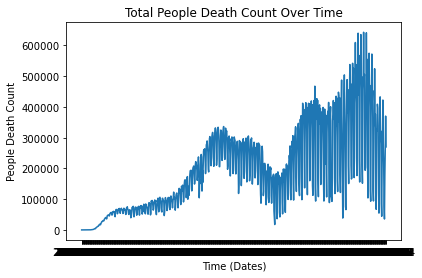

In [43]:
x = new_grouped_df["REPORT_DATE"]
y = new_grouped_df["PEOPLE_DEATH_COUNT"]
plt.plot(x,y)
plt.title("Total People Death Count Over Time")
plt.xlabel("Time (Dates)")
plt.ylabel("People Death Count")
plt.show()

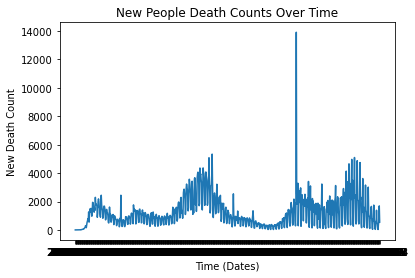

In [44]:
x = new_grouped_df["REPORT_DATE"]
y = new_grouped_df["PEOPLE_DEATH_NEW_COUNT"]
plt.plot(x,y)
plt.title("New People Death Counts Over Time")
plt.xlabel("Time (Dates)")
plt.ylabel("New Death Count")
plt.show()